In [ ]:
'''Name-Vipul Anand
Project-Students Grades Prediction
Batch=DS2312'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [3]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [8]:
#so there are 571 rows and 43 columns

In [4]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
#so clearly we can see that all the values in the seat no. column are different so we need to drop them
data[data.columns[0]].value_counts()

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64

In [6]:
data.drop(columns=data.columns[0],inplace=True)

In [7]:
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [8]:
data.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [9]:
data.shape

(571, 42)

In [20]:
#so out dataset has 571 rows and 42 columns

In [11]:
#Now let us check the  nulls in our columns
data.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [22]:
#so there are nulls in the dataset

In [12]:
data.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [13]:
for i in data:
    print(data[i].value_counts())

PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64
CS-105
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: count, dtype: int64
CS-106
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     

In [25]:
#so all the data is categorical

In [26]:
#so let us remove the outliers

In [10]:
data.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
#so all the data is categorical so let us fill the values with their mean
for i in data.drop(columns=data.columns[41]):
    data[i]=data[i].fillna(value=data[i].mode()[0])

In [12]:
data.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [14]:
#So all the nulls have been removed 
#And as the columns are categorical so we will first encode the dataset
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [15]:
for i in data.drop(columns=data.columns[41]).columns:
    data[i]=lab_enc.fit_transform(data[i])
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [18]:
#so our data has been encoded now
for i in data.columns:
    print(data[i].value_counts())

PH-121
2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: count, dtype: int64
HS-101
2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: count, dtype: int64
CY-105
0     178
2     120
4      50
3      49
5      42
9      31
1      31
6      19
7      17
8      16
10     14
12      3
11      1
Name: count, dtype: int64
HS-105/12
0     97
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
12     2
11     1
Name: count, dtype: int64
MT-111
2     107
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
12      3
11      2
Name: count, dtype: int64
CS-105
0     151
2     134
4      60
3      51
1      43
5      38
7      23
6      22
8      22
10     15
9      12
Name: count, dtype: int64
CS-106
2     118
4     101
3      96
0      56
5      54
7      41
10     

In [16]:
data.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

In [17]:
#let us check the dataypes of the columns
for i in data.columns:
    print(data[i].dtype)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
float64


In [58]:
#So all the data are in int or float so we can proceed with the model builing

In [18]:
for i in data.columns:
    print(data[i].value_counts())

PH-121
2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: count, dtype: int64
HS-101
2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: count, dtype: int64
CY-105
0     178
2     120
4      50
3      49
5      42
9      31
1      31
6      19
7      17
8      16
10     14
12      3
11      1
Name: count, dtype: int64
HS-105/12
0     97
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
12     2
11     1
Name: count, dtype: int64
MT-111
2     107
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
12      3
11      2
Name: count, dtype: int64
CS-105
0     151
2     134
4      60
3      51
1      43
5      38
7      23
6      22
8      22
10     15
9      12
Name: count, dtype: int64
CS-106
2     118
4     101
3      96
0      56
5      54
7      41
10     

In [60]:
#As the data is catgorical so do not need to worry about the outliers

<Axes: >

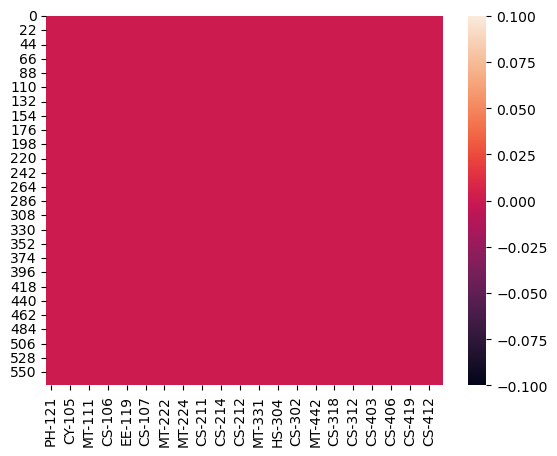

In [22]:
#plotting the heatmap to show if there are any nulls in the data
sns.heatmap(data.isna())

In [23]:
#So in this data there is no null values

In [23]:

data.nunique()

PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [24]:
#data description
data.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [24]:
#we do not need to worry about anything as the data is all categrical

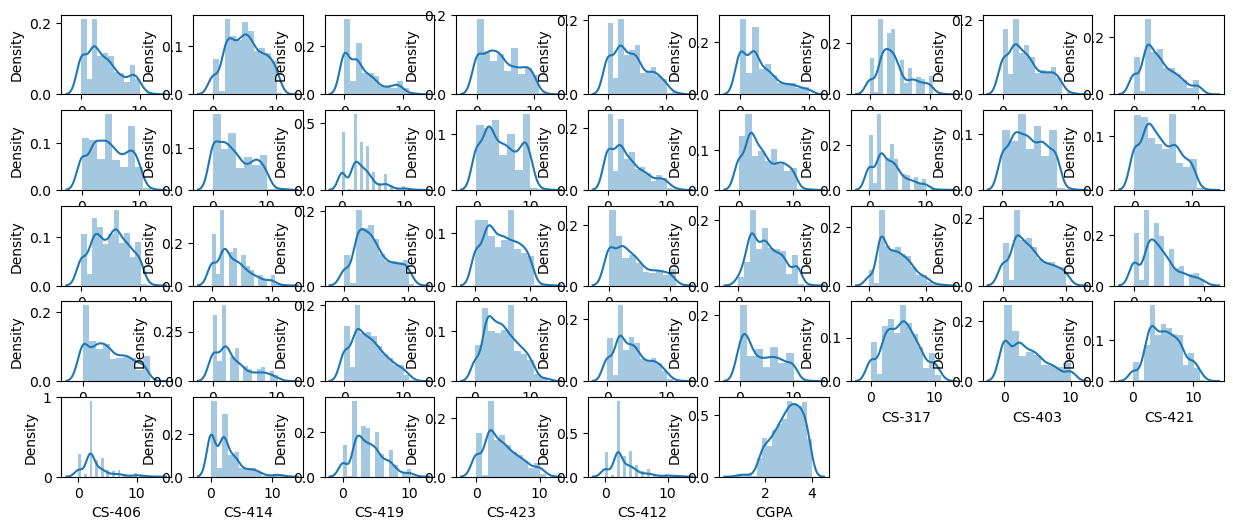

In [25]:
#visualigation of the dataset
plt.figure(figsize=(15,6))
plotnumber=1
for i in data:
    plt.subplot(5,9,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

In [20]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int32  
 1   HS-101     571 non-null    int32  
 2   CY-105     571 non-null    int32  
 3   HS-105/12  571 non-null    int32  
 4   MT-111     571 non-null    int32  
 5   CS-105     571 non-null    int32  
 6   CS-106     571 non-null    int32  
 7   EL-102     571 non-null    int32  
 8   EE-119     571 non-null    int32  
 9   ME-107     571 non-null    int32  
 10  CS-107     571 non-null    int32  
 11  HS-205/20  571 non-null    int32  
 12  MT-222     571 non-null    int32  
 13  EE-222     571 non-null    int32  
 14  MT-224     571 non-null    int32  
 15  CS-210     571 non-null    int32  
 16  CS-211     571 non-null    int32  
 17  CS-203     571 non-null    int32  
 18  CS-214     571 non-null    int32  
 19  EE-217     571 non-null    int32  
 20  CS-212    

In [22]:
#now let us see the correlation matrix of the data
corr=data.corr()

<Axes: >

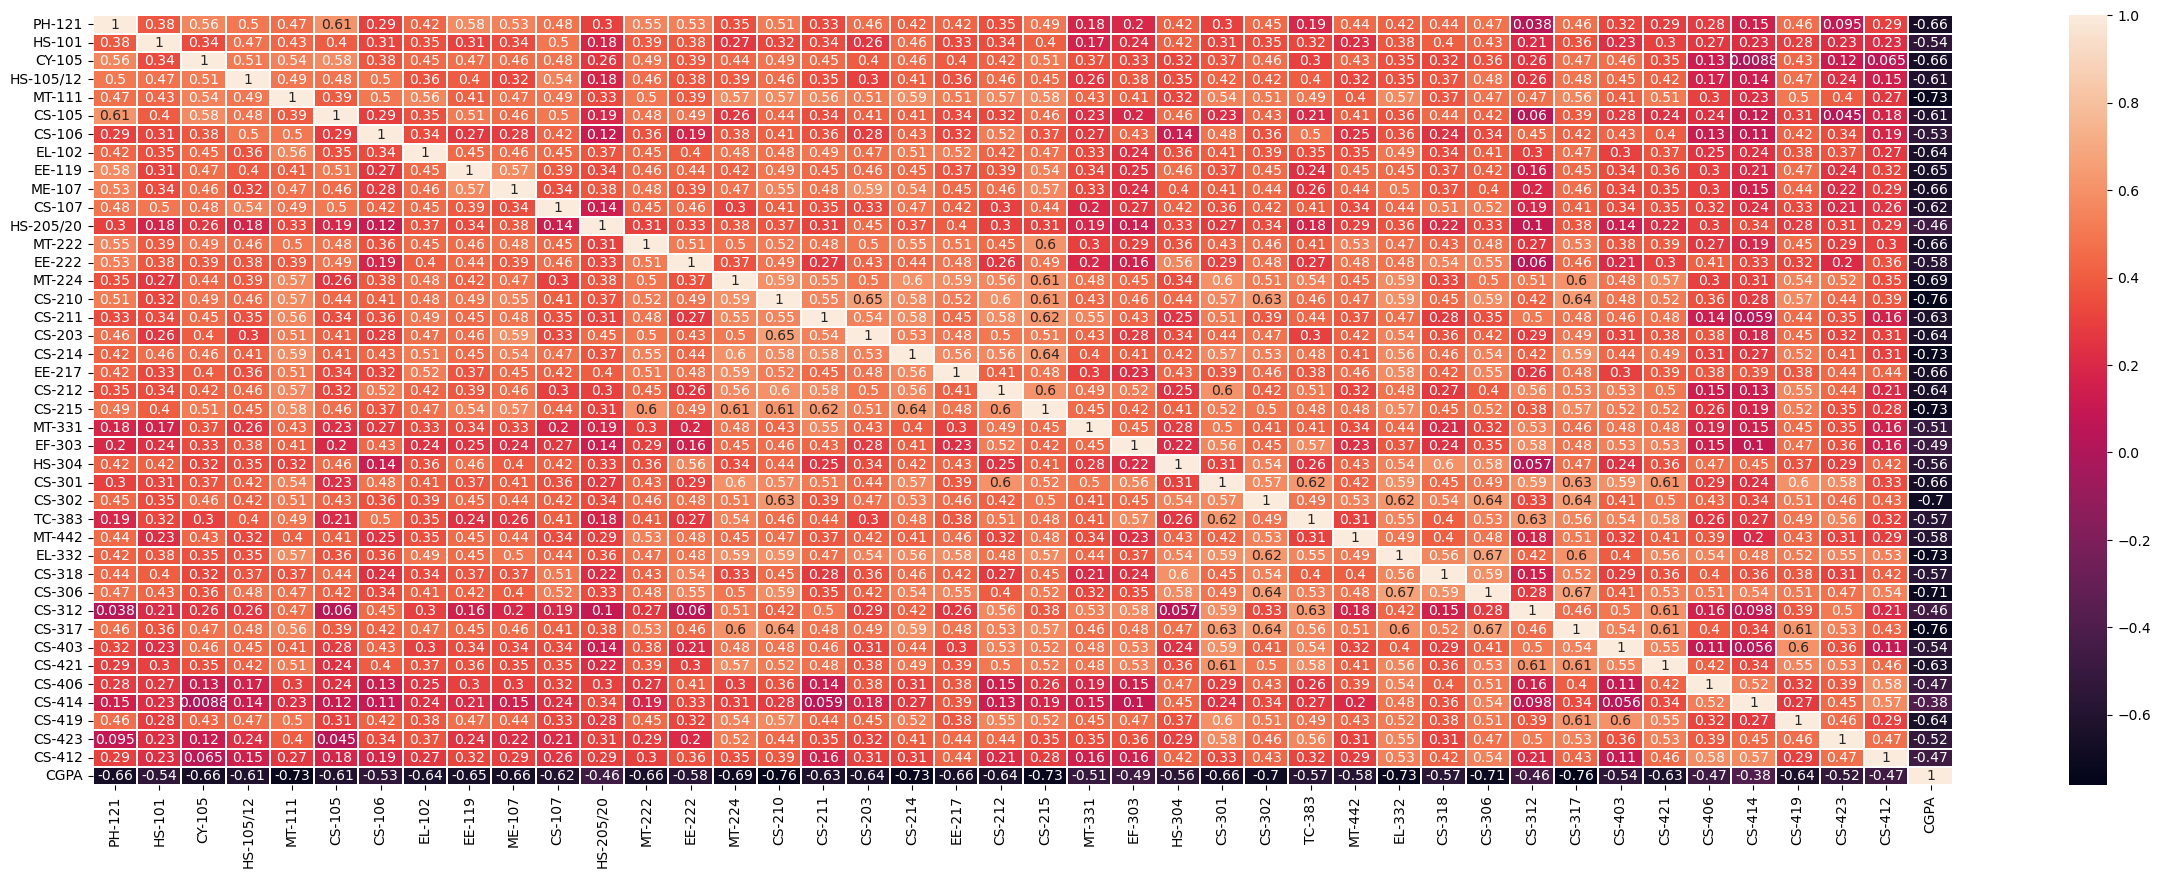

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [24]:
corr['CGPA'].sort_values(ascending=False)
#all the values are very much related to the label

CGPA         1.000000
CS-414      -0.384003
CS-312      -0.458019
HS-205/20   -0.460525
CS-412      -0.466512
CS-406      -0.474419
EF-303      -0.485478
MT-331      -0.508428
CS-423      -0.520968
CS-106      -0.534995
HS-101      -0.537170
CS-403      -0.544543
HS-304      -0.557912
CS-318      -0.566393
TC-383      -0.572329
EE-222      -0.575335
MT-442      -0.582592
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
CS-421      -0.633001
CS-419      -0.641804
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
EE-217      -0.655993
MT-222      -0.656320
CY-105      -0.658282
ME-107      -0.663023
PH-121      -0.663135
CS-301      -0.664117
MT-224      -0.692696
CS-302      -0.696112
CS-306      -0.708299
EL-332      -0.729609
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-317      -0.760792
CS-210      -0.761468
Name: CGPA, dtype: float64

In [30]:
#All the columns are related to the label

In [25]:
#dividing the dataset into feature and label
x=data.drop(columns='CGPA')
y=data['CGPA']

In [87]:
#Apply standardscaler on the data to standardize the feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [27]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


In [28]:
#Now let us check the variance inflation factor of each the column
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled.values,i) for i in range(41)]
vif['columns']=x.columns

In [30]:
vif

,vif,columns
0,2.827608,PH-121
1,1.771294,HS-101
2,2.514966,CY-105
3,2.293035,HS-105/12
4,2.638921,MT-111
5,2.366597,CS-105
6,1.927701,CS-106
7,1.968027,EL-102
8,2.190768,EE-119
9,2.294552,ME-107


In [37]:
#so from the variance inflation score it is cleat that we do not need to remove any of the columns
#And there is no multicollineaity problem in the features so we can proceed further

In [84]:
#so all the preprocessing steps are done as of now so now let us proceed to the model making process

In [31]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.model_selection import cross_val_score    

In [32]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9643494726169242 72


In [34]:
#so the max accuracy is 0.96 and best random state is 72
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [35]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()

In [36]:
models=[rr,er,lr,gb,ad,bg,ri,ls]

In [37]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.9344634170263899, ExtraTreesRegressor(): 0.9627246533517417, LinearRegression(): 0.9687445129503746, GradientBoostingRegressor(): 0.9686573078432831, AdaBoostRegressor(): 0.9050128911006088, BaggingRegressor(): 0.9115323406283258, Ridge(): 0.9689048256828661, LassoCV(): 0.9728592427705376}


In [38]:
accuracy

{RandomForestRegressor(): 0.9344634170263899,
 ExtraTreesRegressor(): 0.9627246533517417,
 LinearRegression(): 0.9687445129503746,
 GradientBoostingRegressor(): 0.9686573078432831,
 AdaBoostRegressor(): 0.9050128911006088,
 BaggingRegressor(): 0.9115323406283258,
 Ridge(): 0.9689048256828661,
 LassoCV(): 0.9728592427705376}

In [39]:
#so as of now lassocv has the best accuracy
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score

In [40]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.9078957294026162
ExtraTreesRegressor() , 0.9263065152622906
LinearRegression() , 0.9034513625626615
GradientBoostingRegressor() , 0.9319795199633335
AdaBoostRegressor() , 0.8635300117532154
BaggingRegressor() , 0.8906236323157165
Ridge() , 0.9036291005426633
LassoCV() , 0.9053948914317054


In [42]:
#We can clearly see the dominance of Gradientboostingregressor so we will proceed with this

In [41]:
model=GradientBoostingRegressor()

In [42]:
from sklearn.model_selection import GridSearchCV

In [45]:
# we will do the hyperparameter tuning of the gradientboosting regressor

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
grid_search=GridSearchCV(model,param_grid,cv=5)

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [46]:
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200} 0.9314877422483494


In [47]:
#so let us use these params in our gradient boost
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=4,min_samples_split=10,n_estimators=200)

In [48]:
model.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=10,
                          n_estimators=200)

In [50]:
pred=model.predict(x_test)
print(r2_score(y_test,pred))

0.9681472065442359


In [51]:
#so our gradient boost has the r2_score of 0.968

In [86]:
#let us test the training data
y_pred=model.predict(x_train)
r2_score(y_train,y_pred)

0.9975283363512866

In [53]:
#The model has training r2 _score of 0.997

In [54]:
#The model building and hyperparameter tuning is all done

In [55]:
#Final conclusions
#1.The lassocv had the best r2_score but after the cross validation gradientboost outperformed all the model includig lassocv
#2.The gradientboost had the r2_score of 0.93 after cross validation
#3.Aftet the hyperparamater tuning the gradientnboost had the r2_score of 0.968 with the test data and 0.99 witht the training data

In [81]:
#Overall metrics of gradient boost
print('The model with best r2_score is ',model)
print('The r2 score of gradientboostregressor model is', r2_score(y_test,pred))
print('The mean absolute error of gradientboostregressor model is', mean_absolute_error(y_test,pred))
print('The mean squared error of gradientboostregressor model is', mean_squared_error(y_test,pred))
print('The root mean squared error of gradientboostregressor model is', np.sqrt(mean_squared_error(y_test,pred)))

The model with best r2_score is  GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=10,
                          n_estimators=200)
The r2 score of gradientboostregressor model is 0.9681472065442359
The mean absolute error of gradientboostregressor model is 0.0814594623485158
The mean squared error of gradientboostregressor model is 0.012643212431302375
The root mean squared error of gradientboostregressor model is 0.11244204031990158


In [82]:
#Let us test the model on some random sample of the dataset
model.predict([x_train.iloc[1]])

array([3.79314997])

In [80]:
y_train.iloc[1]

3.798

In [83]:
#So we can see the model is nearly perfect

In [84]:
#So all the process is over now

In [85]:
#Thanks